In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pickle
plt.rcParams.update({'font.size': 20})

from bandits import BanditMan

%load_ext autoreload
%autoreload 2

# Initialize the Lower Bound Stocchasitc Bandits

In [2]:
run_time = 4000

bandit_prob = np.array([0.5, 0.5+1/np.sqrt(run_time), 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]).reshape(1, -1)

stock_bands = BanditMan(k=10, time_out=run_time, bandit_name='bernoulli', p=bandit_prob)

""" Run the simulations with the different solving algorithms """
uniform_sim = stock_bands.uniform_algo()

e_greedy_sim = stock_bands.e_greedy()

ucb_sim = stock_bands.ucb_one()

thomp_sim = stock_bands.thompsamp()

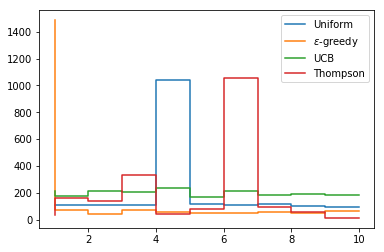

In [3]:
plt.step(np.linspace(1, 10, 10), stock_bands.cum_rewards(uniform_sim[0]))
plt.step(np.linspace(1, 10, 10), stock_bands.cum_rewards(e_greedy_sim[0]))
plt.step(np.linspace(1, 10, 10), stock_bands.cum_rewards(ucb_sim[0]))
plt.step(np.linspace(1, 10, 10), stock_bands.cum_rewards(thomp_sim[0]))

plt.legend(('Uniform', '$\epsilon$-greedy', 'UCB', 'Thompson'))

plt.show()

In [4]:
pickle.dump( uniform_sim, open( "uniform_simulation.p", "wb" ) )

data_uniform = pickle.load( open( "uniform_simulation.p", "rb" ) )

# Cumlative Reward


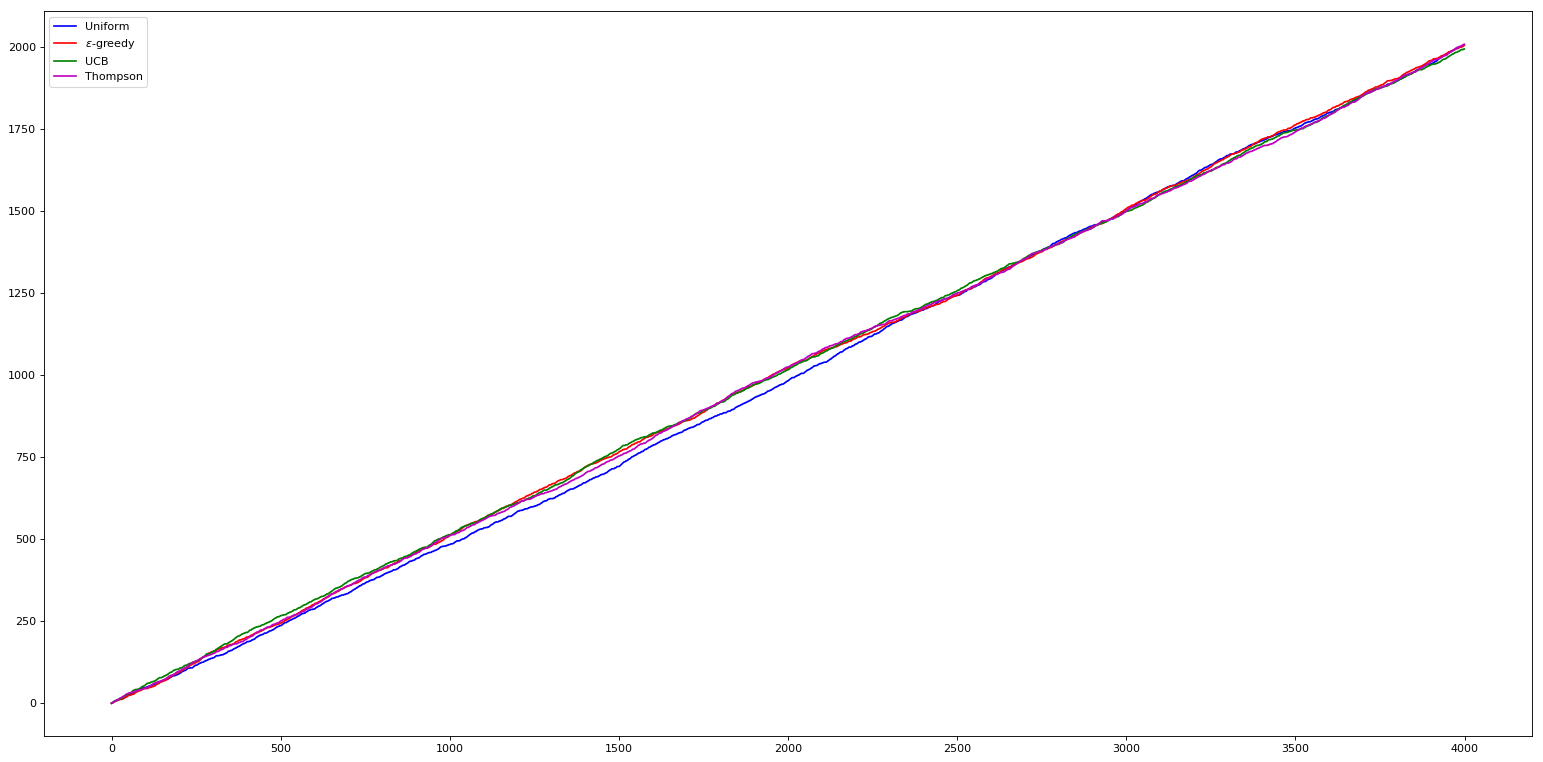

In [5]:
"""Find the cumlative rewards if different """
reward_mat = np.zeros((4, stock_bands.time_out))

for t in range(1, stock_bands.time_out):
    
    reward_mat[0, t] = stock_bands.algo_reward(uniform_sim[0][:, 0:t])
    reward_mat[1, t] = stock_bands.algo_reward(e_greedy_sim[0][:, 0:t])
    reward_mat[2, t] = stock_bands.algo_reward(ucb_sim[0][:, 0:t])
    reward_mat[3, t] = stock_bands.algo_reward(thomp_sim[0][:, 0:t])

cum_reward_fig = plt.figure(num=None, figsize=(24, 12), dpi=80, facecolor='w', edgecolor='k')

plt.plot(reward_mat[0, :], 'b')
plt.plot(reward_mat[1, :], 'r')
plt.plot(reward_mat[2, :], 'g')
plt.plot(reward_mat[3, :], 'm')

plt.legend(('Uniform', '$\epsilon$-greedy', 'UCB', 'Thompson'))

plt.show()

# Regret vs Time

In [6]:
regret_mat = np.zeros((4, stock_bands.time_out))

for t in range(1, stock_bands.time_out):
    
    regret_mat[0, t] = stock_bands.regret_at_t(uniform_sim[0], t)
    regret_mat[1, t] = stock_bands.regret_at_t(e_greedy_sim[0], t)
    regret_mat[2, t] = stock_bands.regret_at_t(ucb_sim[0], t)
    regret_mat[3, t] = stock_bands.regret_at_t(thomp_sim[0], t)



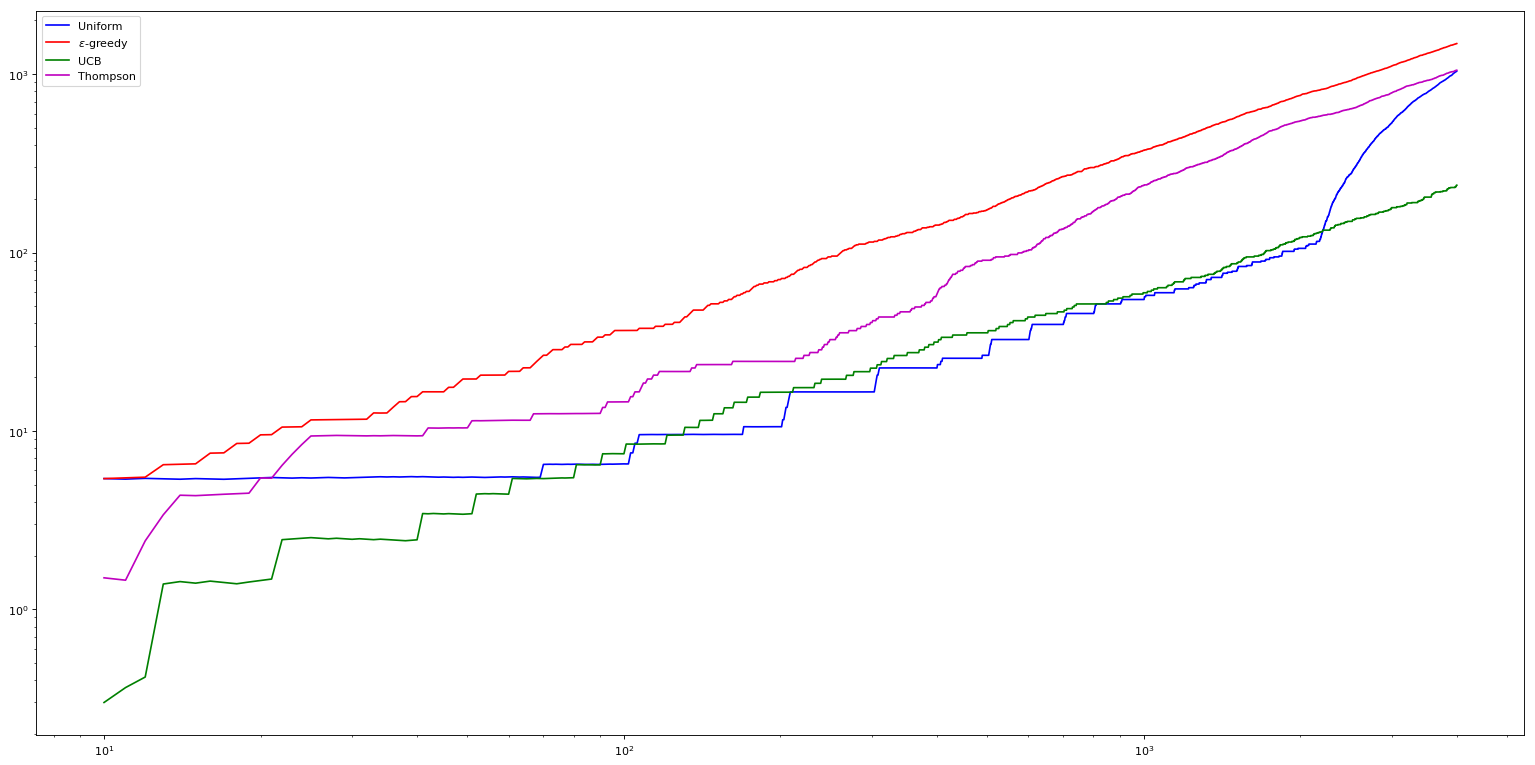

In [7]:
regret_fig = plt.figure(num=None, figsize=(24, 12), dpi=80, facecolor='w', edgecolor='k')

plot_start = 10

log_t = (np.linspace(plot_start, stock_bands.time_out, stock_bands.time_out-plot_start))

plt.loglog(log_t, (regret_mat[0, plot_start:]), 'b')
plt.loglog(log_t, (regret_mat[1, plot_start:]), 'r')
plt.loglog(log_t, (regret_mat[2, plot_start:]), 'g')
plt.loglog(log_t, (regret_mat[3, plot_start:]), 'm')

plt.legend(('Uniform', '$\epsilon$-greedy', 'UCB', 'Thompson'))
plt.savefig('lower_bound.pdf')
plt.show()

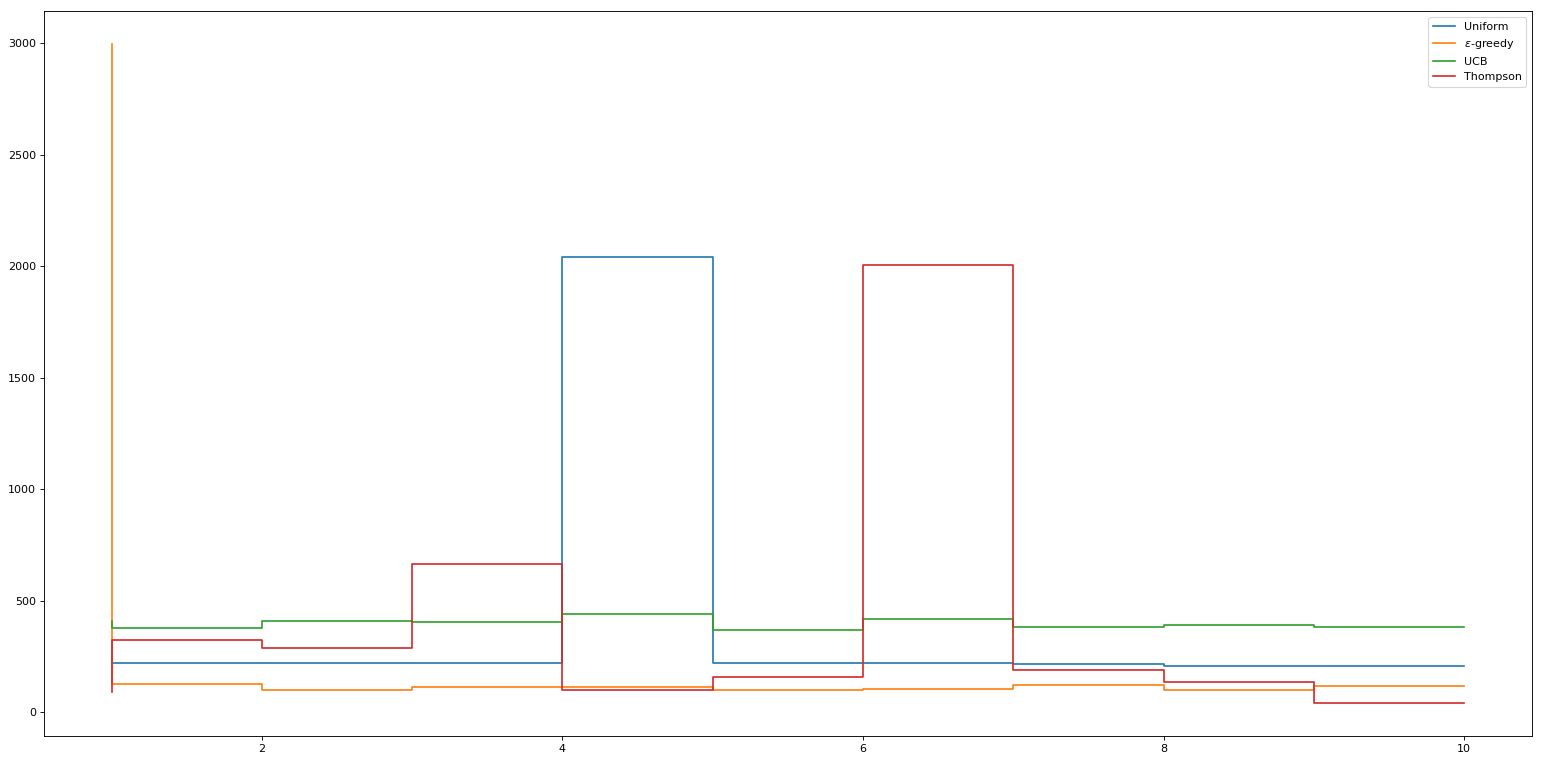

In [8]:
hist_figure = plt.figure(num=None, figsize=(24, 12), dpi=80, facecolor='w', edgecolor='k')

hist_uni = stock_bands.count_occur(uniform_sim[1])
hist_e_greedy = stock_bands.count_occur(e_greedy_sim[1])
hist_ucb = stock_bands.count_occur(ucb_sim[1])
hist_thomp = stock_bands.count_occur(thomp_sim[1])

plt.step(np.linspace(1, 10, 10), hist_uni)
plt.step(np.linspace(1, 10, 10), hist_e_greedy)
plt.step(np.linspace(1, 10, 10), hist_ucb)
plt.step(np.linspace(1, 10, 10), hist_thomp)

plt.legend(('Uniform', '$\epsilon$-greedy', 'UCB', 'Thompson'))

plt.show()
